# Assignment 2

# Q1. Word Classification

## Q1.1 Implement the Evaluation Metrics

In [115]:
## Calculates the precision of the predicted labels
def get_precision(y_pred, y_true):
    TP = 0
    FP = 0
    for i in range(len(y_pred)):
        if y_pred[i]:
            if y_true[i]:
                TP += 1
            else:
                FP += 1
    precision = float(TP/(TP + FP))
    return precision


## Calculates the recall of the predicted labels
def get_recall(y_pred, y_true):
    TP = 0
    FN = 0
    for i in range(len(y_pred)):
        if y_true[i]:
            if y_pred[i]:
                TP += 1
            else:
                FN += 1
    recall = float(TP/(TP + FN))
    return recall


## Calculates the f-score of the predicted labels
def get_fscore(y_pred, y_true):
    precision = get_precision(y_pred, y_true)
    recall = get_recall(y_pred, y_true)
    fscore = 2 * precision * recall / (precision + recall)
    return fscore

## Print the precision, recall and f-score of the predicted labels
def test_predictions(y_pred, y_true):
    print('precision: ' + str(get_precision(y_pred, y_true)))
    print('recall: ' + str(get_recall(y_pred, y_true)))
    print('f-score: ' + str(get_fscore(y_pred, y_true)))

The above functions recive a vector of predictions and a vector of true labels, and compute a score that implies the quality of the predictions. The computed score are: precision, recall, and f-score.

## Q1.2 Baselines
### 1.2.1 Majority Class Baseline

In [116]:
import itertools
## Loads in the words and labels of one of the datasets
def load_file(data_file):
    words = []
    labels = []
    with open(data_file, 'rt', encoding="utf8") as f:
        i = 0
        for line in f:
            if i > 0:
                line_split = line[:-1].split("\t")
                words.append(line_split[0].lower())
                labels.append(int(line_split[1]))
            i += 1
    return words, labels


### 1.2.1: A very simple baseline

## Labels every word complex
def all_complex(data_file):
    _, y_true = load_file(data_file)
    y_pred = list(itertools.repeat(1, len(y_true)))  # create list of complex labels
    precision = get_precision(y_pred, y_true)
    recall = get_recall(y_pred, y_true)
    fscore = get_fscore(y_pred, y_true)
    performance = [precision, recall, fscore]
    return performance

data_file = 'complex_words_training.txt'
performance = all_complex(data_file)
print('Training precision: ' + str(performance[0]))
print('Training recall: ' + str(performance[1]))
print('Training f-score: ' + str(performance[2]))

data_file = 'complex_words_development.txt'
performance = all_complex(data_file)
print('Development precision: ' + str(performance[0]))
print('Development recall: ' + str(performance[1]))
print('Development f-score: ' + str(performance[2]))

Training precision: 0.43275
Training recall: 1.0
Training f-score: 0.604083057058105
Development precision: 0.418
Development recall: 1.0
Development f-score: 0.5895627644569816


The above code computed the precision, recall and f-score for the training and develpoment datasets, when the predictions are all complex. The precision for both datasets is about 40%. Since we predicted all comlpex, this number is actually the number of coplex words in the dataset. The recall is naturally 1.0, since there are no "negative" predictions. 

### 1.2.2 Word Length Baseline

Best n for training set: 6
Best n for development set: 6
[0.6007401315789473, 0.8440207972270364, 0.7018976699495555]
[0.6053511705685619, 0.8660287081339713, 0.7125984251968505]


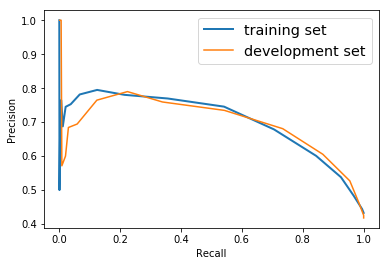

In [117]:
import matplotlib.pyplot as plt
import matplotlib
### 1.2.2: Word length thresholding

## Finds the best length threshold by f-score, and uses this threshold to
## classify the training and development set
def word_length_threshold(training_file, development_file):
    # compute predictions for training set
    words_train, y_true_train = load_file(training_file)
    max_length = len(max(words_train, key=len)) # the maximal length of a word
    tfscore = 0
    best_n = 0
    tprecision_list = list()
    trecall_list = list()
    for n in range(2, max_length):
        y_pred_train = list()
        for i in range(len(words_train)):
            y_pred_train.append(len(words_train[i]) > n)
        tprecision_list.append(get_precision(y_pred_train, y_true_train))
        trecall_list.append(get_recall(y_pred_train, y_true_train))
        temp_fscore = get_fscore(y_pred_train, y_true_train)
        if temp_fscore > tfscore:
            tfscore = temp_fscore
            best_n = n
    print('Best n for training set: ' + str(best_n))
    
    # plot training set recall-precision curve
    fig, ax = plt.subplots()
    ax.plot(trecall_list, tprecision_list, label='training set', linewidth=2)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
        

    # compute precision, recall and fscore for best n
    y_pred_train = list()
    for i in range(len(words_train)):
        y_pred_train.append(len(words_train[i]) > best_n)
    tprecision = get_precision(y_pred_train, y_true_train)
    trecall = get_recall(y_pred_train, y_true_train)

    # compute predictions for dev set
    words_dev, y_true_dev = load_file(development_file)
    max_length = len(max(words_dev, key=len))  # the maximal length of a word
    dfscore = 0
    best_n = 0
    dprecision_list = list()
    drecall_list = list()
    for n in range(2, max_length):
        y_pred_dev = list()
        for i in range(len(words_dev)):
            y_pred_dev.append(len(words_dev[i]) > n)
        dprecision_list.append(get_precision(y_pred_dev, y_true_dev))
        drecall_list.append(get_recall(y_pred_dev, y_true_dev))
        temp_fscore = get_fscore(y_pred_dev, y_true_dev)
        if temp_fscore > dfscore:
            dfscore = temp_fscore
            best_n = n
    print('Best n for development set: ' + str(best_n))
    
    # plot training set recall-precision curve
    ax.plot(drecall_list, dprecision_list, label='development set')
    ax.legend(loc='upper right', fontsize='x-large')    

    # compute precision, recall and fscore for best n
    y_pred_dev = list()
    for i in range(len(words_dev)):
        y_pred_dev.append(len(words_dev[i]) > best_n)
    dprecision = get_precision(y_pred_dev, y_true_dev)
    drecall = get_recall(y_pred_dev, y_true_dev)

    training_performance = [tprecision, trecall, tfscore]
    development_performance = [dprecision, drecall, dfscore]
    return training_performance, development_performance

training_performance, development_performance = word_length_threshold('complex_words_training.txt', 'complex_words_development.txt')
print(training_performance)
print(development_performance)

The above function tests different word lengths as calissification parameter, and chooses the length (n) which yields the highest f-score. We tested with word length between 2 and the length of the longest word in the dataset minus 1. Testing the length of the longest word as a threshold is equivalent to making only negative predictions, which leads to a problem in computing the precision and the recall (division in zero). The best f-score for both training and development sets was recived for n=6. The precision is about 0.6, and the recall 0.85.
<br><br>
We also plotted the precision-recall curve of the training and delopment datasets for the various word length. 

### 1.2.3 Word Frequency Baseline

[4167701       7       1       1       2       0       1       0       0
       1]
[4.00000000e+01 4.73768300e+09 9.47536596e+09 1.42130489e+10
 1.89507319e+10 2.36884148e+10 2.84260978e+10 3.31637808e+10
 3.79014637e+10 4.26391467e+10 4.73768297e+10]
4737683001.1
Best threshold for training set: 50000000
Best threshold for development set: 14900000
Training set performance: [0.5657051282051282, 0.8157134604274986, 0.6680861130825645]
Development set performance: [0.5824742268041238, 0.8110047846889952, 0.6779999999999999]


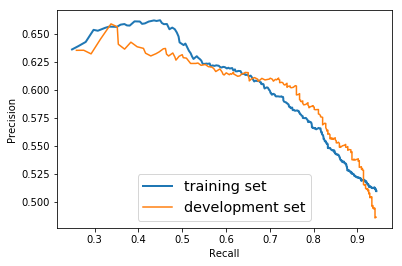

In [118]:
from collections import defaultdict
import gzip
import numpy as np
### 1.2.3: Word frequency thresholding

## Loads Google NGram counts
def load_ngram_counts(ngram_counts_file):
    counts = defaultdict(int)
    with gzip.open(ngram_counts_file, 'rt', encoding="utf8") as f:
        for line in f:
            token, count = line.strip().split('\t')
            if token[0].islower():
                counts[token] = int(count)
    return counts

# Finds the best frequency threshold by f-score, and uses this threshold to
## classify the training and development set
def word_frequency_threshold(training_file, development_file, counts):
    
    thresholds = range(1000000, 50100000, 100000)
    # compute predictions for training set
    words_train, y_true_train = load_file(training_file)
    tfscore = 0
    best_threshold = 0
    tprecision_list = list()
    trecall_list = list()
    for threshold in thresholds:
        y_pred_train = list()
        for word in words_train:
            f = 0
            if word in counts:
                f = counts[word]
            y_pred_train.append(f < threshold)
        tprecision_list.append(get_precision(y_pred_train, y_true_train))
        trecall_list.append(get_recall(y_pred_train, y_true_train))
        temp_fscore = get_fscore(y_pred_train, y_true_train)
        if temp_fscore > tfscore:
            tfscore = temp_fscore
            best_threshold = threshold
    print('Best threshold for training set: ' + str(threshold))
    
    # get precision and recall for best threshold
    tprecision = tprecision_list[thresholds.index(best_threshold)]
    trecall = trecall_list[thresholds.index(best_threshold)]
    
    # plot training set recall-precision curve
    fig, ax = plt.subplots()
    ax.plot(trecall_list, tprecision_list, label='training set', linewidth=2)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    
          
    # compute predictions for dev set
    words_dev, y_true_dev = load_file(development_file)
    dfscore = 0
    best_threshold = 0
    dprecision_list = list()
    drecall_list = list()
    for threshold in thresholds:
        y_pred_dev = list()
        for word in words_dev:
            f = 0
            if word in counts:
                f = counts[word]
            y_pred_dev.append(f < threshold)
        dprecision_list.append(get_precision(y_pred_dev, y_true_dev))
        drecall_list.append(get_recall(y_pred_dev, y_true_dev))
        temp_fscore = get_fscore(y_pred_dev, y_true_dev)
        if temp_fscore > dfscore:
            dfscore = temp_fscore
            best_threshold = threshold
    print('Best threshold for development set: ' + str(best_threshold))
    
    # compute precision, recall and fscore for best n
    dprecision = dprecision_list[thresholds.index(best_threshold)]
    drecall = drecall_list[thresholds.index(best_threshold)]
    
    # plot precision-recall curve for development set
    ax.plot(drecall_list, dprecision_list, label='development set')
    ax.legend(loc='lower center', fontsize='x-large')

    training_performance = [tprecision, trecall, tfscore]
    development_performance = [dprecision, drecall, dfscore]
    return training_performance, development_performance

# print histogram of counts
counts = load_ngram_counts('ngram_counts.txt.gz')  # load word frequencies
data = list(counts.values())
hist, bin_edges = np.histogram(data, bins=10)
print(hist)
print(bin_edges)
print(bin_edges[1])


training_performance, development_performance = word_frequency_threshold('complex_words_training.txt', 'complex_words_development.txt', counts)
print('Training set performance: ' + str(training_performance))
print('Development set performance: ' + str(development_performance))

The above code computes the precision, recall and f-score of the training and development datasets, when the predictions are made using a threshold of frequencies. First, we look at the histogram and the bin edges of Google's word frequencies file. It is possible to see that the vast majority of the words are in the first bin of the histogram, which its upper edge it about 50 million. And so we use a threshold with skips of 100,000 up to 50 million. 

## Q1.3 Classifiers

In [41]:
import numpy as np
from sklearn.naive_bayes import GaussianNB

def naive_bayes(training_file, development_file, counts):
    
    # build X_train
    words_train, y_true_train = load_file(training_file)
    X_train = list()
    for word in words_train:
        l = len(word)
        f = 0
        if word in counts:
            f = counts[word]
        X_train.append([l, f])
    
    # normalize X_train
    X_train_matrix = np.matrix(X_train)
    X_train_mean = X_train_matrix.mean(0)
    X_train_std = X_train_matrix.std(0)
    X_train_matrix = (X_train_matrix - X_train_mean) / X_train_std
    
    # learn classifier
    Y = np.array(y_true_train)
    clf = GaussianNB()
    clf.fit(X_train_matrix, Y)
    
    # use classify to predict training set labels
    Y_pred_train = clf.predict(X_train_matrix)
    # compute precision, recall and f-score for the training predicted lables
    tprecision = get_precision(Y_pred_train.tolist(), y_true_train)
    trecall = get_recall(Y_pred_train.tolist(), y_true_train)
    tfscore = get_fscore(Y_pred_train.tolist(), y_true_train)
    training_performance = [tprecision, trecall, tfscore]
    
    # build X_dev
    words_dev, y_true_dev = load_file(development_file)
    X_dev = list()
    for word in words_dev:
        l = len(word)
        f = 0
        if word in counts:
            f = counts[word]
        X_dev.append([l, f])
        
    # normalize X_dev
    X_dev_matrix = np.matrix(X_dev)
    X_dev_matrix = (X_dev_matrix - X_train_mean) / X_train_std
    
    # use classifier to predict development set labels
    Y_pred_dev = clf.predict(X_dev_matrix)
    # compute precision, recall and f-score for the training predicted lables
    dprecision = get_precision(Y_pred_dev.tolist(), y_true_dev)
    drecall = get_recall(Y_pred_dev.tolist(), y_true_dev)
    dfscore = get_fscore(Y_pred_dev.tolist(), y_true_dev)
    development_performance = [dprecision, drecall, dfscore]
    
    return training_performance, development_performance
        
counts = load_ngram_counts('ngram_counts.txt.gz')  # load word frequencies
training_performance, development_performance = naive_bayes('complex_words_training.txt', 'complex_words_development.txt', counts)
print('Training set performance: ' + str(training_performance))
print('Development set performance: ' + str(development_performance))   


Training set performance: [0.4950379451255108, 0.9797804737146159, 0.6577467519875897]
Development set performance: [0.46929316338354576, 0.9688995215311005, 0.6323185011709602]


The above code learns a Naive Bayes classifier with the training set, and then computes the precision, recall and f-score of the labels predicted by the model for the training set and development set. The precision and recall of both training and developemnt sets are quite simillar to the performance of the majority class baseline. This means that the classifier has a strong bias towards the positive labels. 

## Q1.4. Ambiguity

In [46]:
#  print context-sensitive words
words, y_true = load_file('complex_words_training.txt')
words_array = np.array(words)
context_sensitive = list()
for word in words:
    searchval = word
    inds = np.where(words_array == searchval)[0]
    labels = [y_true[i] for i in inds.tolist()] # get all labels of the word
    max_label = max(labels)
    if sum(labels) != max_label*len(labels): # check if the word has different labels
        context_sensitive.append(word)

print(sorted(set(context_sensitive)))
 

['campaign', 'commissioner', 'district', 'element', 'hoverboard', 'indy', 'inspired', 'league', 'opponents', 'slavery', 'sprouts']


The above code prints all words in complex_words_training.txt that are labeled both complex and simple, meaning that their label is context-sensitive. Out of 3882 different words, 11 are context-sensitive. 

# Q2  Document Classification
## Q2.1. Reuters Dataset

In [51]:
# Authors: Eustache Diemert <eustache@diemert.fr>
#          @FedericoV <https://github.com/FedericoV/>
# License: BSD 3 clause

from __future__ import print_function
from glob import glob
import itertools
import os.path
import re
import tarfile
import time
import sys

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams

from sklearn.externals.six.moves import html_parser
from sklearn.externals.six.moves.urllib.request import urlretrieve
from sklearn.datasets import get_data_home
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import Perceptron
from sklearn.naive_bayes import MultinomialNB


def _not_in_sphinx():
    # Hack to detect whether we are running by the sphinx builder
    return '__file__' in globals()
    

In [52]:
class ReutersParser(html_parser.HTMLParser):
    """Utility class to parse a SGML file and yield documents one at a time."""

    def __init__(self, encoding='latin-1'):
        html_parser.HTMLParser.__init__(self)
        self._reset()
        self.encoding = encoding

    def handle_starttag(self, tag, attrs):
        method = 'start_' + tag
        getattr(self, method, lambda x: None)(attrs)

    def handle_endtag(self, tag):
        method = 'end_' + tag
        getattr(self, method, lambda: None)()

    def _reset(self):
        self.in_title = 0
        self.in_body = 0
        self.in_topics = 0
        self.in_topic_d = 0
        self.title = ""
        self.body = ""
        self.topics = []
        self.topic_d = ""

    def parse(self, fd):
        self.docs = []
        for chunk in fd:
            self.feed(chunk.decode(self.encoding))
            for doc in self.docs:
                yield doc
            self.docs = []
        self.close()

    def handle_data(self, data):
        if self.in_body:
            self.body += data
        elif self.in_title:
            self.title += data
        elif self.in_topic_d:
            self.topic_d += data

    def start_reuters(self, attributes):
        pass

    def end_reuters(self):
        self.body = re.sub(r'\s+', r' ', self.body)
        self.docs.append({'title': self.title,
                          'body': self.body,
                          'topics': self.topics})
        self._reset()

    def start_title(self, attributes):
        self.in_title = 1

    def end_title(self):
        self.in_title = 0

    def start_body(self, attributes):
        self.in_body = 1

    def end_body(self):
        self.in_body = 0

    def start_topics(self, attributes):
        self.in_topics = 1

    def end_topics(self):
        self.in_topics = 0

    def start_d(self, attributes):
        self.in_topic_d = 1

    def end_d(self):
        self.in_topic_d = 0
        self.topics.append(self.topic_d)
        self.topic_d = ""


def stream_reuters_documents(data_path=None):
    """Iterate over documents of the Reuters dataset.

    The Reuters archive will automatically be downloaded and uncompressed if
    the `data_path` directory does not exist.

    Documents are represented as dictionaries with 'body' (str),
    'title' (str), 'topics' (list(str)) keys.

    """

    DOWNLOAD_URL = ('http://archive.ics.uci.edu/ml/machine-learning-databases/'
                    'reuters21578-mld/reuters21578.tar.gz')
    ARCHIVE_FILENAME = 'reuters21578.tar.gz'

    if data_path is None:
        data_path = os.path.join(get_data_home(), "reuters")
    if not os.path.exists(data_path):
        """Download the dataset."""
        print("downloading dataset (once and for all) into %s" %
              data_path)
        os.mkdir(data_path)

        def progress(blocknum, bs, size):
            total_sz_mb = '%.2f MB' % (size / 1e6)
            current_sz_mb = '%.2f MB' % ((blocknum * bs) / 1e6)
            if _not_in_sphinx():
                sys.stdout.write(
                    '\rdownloaded %s / %s' % (current_sz_mb, total_sz_mb))

        archive_path = os.path.join(data_path, ARCHIVE_FILENAME)
        urlretrieve(DOWNLOAD_URL, filename=archive_path,
                    reporthook=progress)
        if _not_in_sphinx():
            sys.stdout.write('\r')
        print("untarring Reuters dataset...")
        tarfile.open(archive_path, 'r:gz').extractall(data_path)
        print("done.")

    parser = ReutersParser()
    for filename in glob(os.path.join(data_path, "*.sgm")):
        for doc in parser.parse(open(filename, 'rb')):
            yield doc

In [59]:
import pandas as pd
# get iterator of Reuters-21578
data_stream = stream_reuters_documents()

topics = defaultdict(int)
num_docs = 0
for doc in data_stream:
    num_docs += 1
    for topic in doc['topics']:
        topics[topic] += 1
        
print('Number of documents: ' + str(num_docs))
print('Number of categories: ' + str(len(topics)))

statistics = pd.Series(stats).describe()
print('Mean: ' + str(statistics['mean']))
print('Std: ' + str(statistics['std']))
print('Min: ' + str(statistics['min']))
print('Max: ' + str(statistics['max']))

Number of documents: 21578
Number of categories: 445
Mean: 89.87191011235954
Std: 644.6569094125375
Min: 1.0
Max: 12542.0


There are 21,578 different documents in the dataset, and 445 different topics/categories. The average number of documents per topic is ~90, and the most popular category has 12,542 documents assigned to.

In [83]:
positive_class = 'acq'
def get_minibatch(doc_iter, size, pos_class=positive_class):
    """Extract a minibatch of examples, return a tuple X_text, y.

    Note: size is before excluding invalid docs with no topics assigned.

    """
    data = [(u'{title}\n\n{body}'.format(**doc), pos_class in doc['topics'])
            for doc in itertools.islice(doc_iter, size)
            if doc['topics']]
    if not len(data):
        return np.asarray([], dtype=int), np.asarray([], dtype=int)
    X_text, y = zip(*data)
    return X_text, np.asarray(y, dtype=int)

data_stream = stream_reuters_documents()

num_chars = 0
num_words = 0
examps = get_minibatch(data_stream, 21578) # get all documents
for doc in examps[0]:
    num_chars += len(doc)
    num_words += len(doc.split())

print('Number of characters: ' + str(num_chars))
print('Number of words: ' + str(num_words))

Number of characters: 16003823
Number of words: 2638722


The above code prints the number of characters and words in the corpus. We treat a word as a token with space before or after it.

The code discusses the following classifiers: stochastic gradient decent (SGD), perceptron, multinomial naive Bayes, and passive-agressive. All these classifiers allow to perform the training phase in batches, i.e. they don't have to see all the training data at once. This is why these classifiers support the 'partial-fit' method, which doesn't load all the data at once to the memory, but does so in batches.

Hashing vectorizer is a function of sklearn which is used for feature representation in online learning. Since the data is seen in batches, we cannot hold the entire vocabulary, and so the function allows to pick in advance the size of the feature space (with the argument n_features), and then all features in each batch wil be projected on this space.

### Q2.2 Spam Dataset

In [1]:
%matplotlib inline
import os
import sys
import numpy
from pandas import DataFrame
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, f1_score

def progress(i, end_val, bar_length=50):
    '''
    Print a progress bar of the form: Percent: [#####      ]
    i is the current progress value expected in a range [0..end_val]
    bar_length is the width of the progress bar on the screen.
    '''
    percent = float(i) / end_val
    hashes = '#' * int(round(percent * bar_length))
    spaces = ' ' * (bar_length - len(hashes))
    sys.stdout.write("\rPercent: [{0}] {1}%".format(hashes + spaces, int(round(percent * 100))))
    sys.stdout.flush()

NEWLINE = '\n'

HAM = 'ham'
SPAM = 'spam'

SOURCES = [
    ('spam',        SPAM),
    ('easy_ham',    HAM),
    ('hard_ham',    HAM),
    ('beck-s',      HAM),
    ('farmer-d',    HAM),
    ('kaminski-v',  HAM),
    ('kitchen-l',   HAM),
    ('lokay-m',     HAM),
    ('williams-w3', HAM),
    ('BG',          SPAM),
    ('GP',          SPAM),
    ('SH',          SPAM)
]

SKIP_FILES = {'cmds'}


def read_files(path):
    '''
    Generator of pairs (filename, filecontent)
    for all files below path whose name is not in SKIP_FILES.
    The content of the file is of the form:
        header....
        <emptyline>
        body...
    This skips the headers and returns body only.
    '''
    for root, dir_names, file_names in os.walk(path):
        for path in dir_names:
            read_files(os.path.join(root, path))
        for file_name in file_names:
            if file_name not in SKIP_FILES:
                file_path = os.path.join(root, file_name)
                if os.path.isfile(file_path):
                    past_header, lines = False, []
                    f = open(file_path, encoding="latin-1")
                    for line in f:
                        if past_header:
                            lines.append(line)
                        elif line == NEWLINE:
                            past_header = True
                    f.close()
                    content = NEWLINE.join(lines)
                    yield file_path, content


def build_data_frame(l, path, classification):
    rows = []
    index = []
    for i, (file_name, text) in enumerate(read_files(path)):
        if ((i+l) % 100 == 0):
            progress(i+l, 58910, 50)
        rows.append({'text': text, 'class': classification})
        index.append(file_name)
   
    data_frame = DataFrame(rows, index=index)
    return data_frame, len(rows)

def load_data():
    data = DataFrame({'text': [], 'class': []})
    l = 0
    for path, classification in SOURCES:
        data_frame, nrows = build_data_frame(l, path, classification)
        data = data.append(data_frame, sort=False)
        l += nrows
    data = data.reindex(numpy.random.permutation(data.index))
    return data

data=load_data()

Percent: [##################################################] 100%

In [20]:
count_vectorizer = CountVectorizer(ngram_range=(1, 2))
counts_mat = count_vectorizer.fit_transform(data['text'].values)
features = count_vectorizer.get_feature_names()
num_bigrams = 0
# if the feature contains space, it's a bigram
for f in features:
    if ' ' in f:
        num_bigrams += 1
num_unigrams = len(features) - num_bigrams
print('Number of unigrams: ' + str(num_unigrams))
print('Number of bigrams: ' + str(num_bigrams))

Number of unigrams: 697570
Number of bigrams: 3318380


In [30]:
import heapq
import numpy as np
def top_n_unigrams_bigrams(counts_mat, features_names, n = 50):
    counts_vec = counts_mat.sum(axis=0) # get counts for each feature
    counts_vec = np.squeeze(np.asarray(counts_vec))
    most_freq_inds = heapq.nlargest(n, range(len(counts_vec)), counts_vec.__getitem__) # get n most frequent features
    most_freq_features = [features_names[i] for i in most_freq_inds]
    return most_freq_features

# get top 50 for the entire dataset
n=50
most_freq_features = top_n_unigrams_bigrams(counts_mat, features)
print('Top ' + str(n) + ' unigrams and bigrams: ' + str(most_freq_features))

Top 50 unigrams and bigrams: ['font', '3d', 'the', 'br', 'td', 'to', 'and', 'nbsp', 'of', 'http', '20', 'size', 'tr', 'in', 'width', 'com', 'nbsp nbsp', 'you', 'br br', 'face', 'for', 'border', 'is', 'style', 'this', 'align', 'span', 'href', 'height', 'html', 'color', 'www', 'font size', 'td tr', 'http www', 'font face', 'that', 'on', 'td td', 'your', 'content', 'tr td', 'table', 'with', 'be', 'div', '3d http', 'arial', 'it', 'style 3d']


In [41]:
# get top 50 for spam data
spam_data = data[data['class'] == 'spam']
spam_cv = CountVectorizer(ngram_range=(1, 2))
spam_counts_mat = spam_cv.fit_transform(spam_data['text'].values)
most_freq_features = top_n_unigrams_bigrams(spam_counts_mat, features)
print('Top ' + str(n) + ' unigrams and bigrams in spam data: ' + str(most_freq_features))

Top 50 unigrams and bigrams in spam data: ['corporate functions', '2220 pdt', 'apocalyptical adipescent', 'major ity', 'growth was', 'markets calm', 'leaden yesterday', 'miltuykjynqhaajdboefgfzesuyvkhg br', 'meteorology bargaininternational', '15 transmission', 'doors comes', '_nextpart_095_8247_18l6xskw z92s6715', 'gtooofsweii pq0de5kszbpkavs', 'now recognised', 'his brown', 'appointed administrators', 'competentba nk', 'antoine jacoutot', 'loud disruption', 'likely decrease', '99zjxhqbfw8eb2dmxotmpeurargwhe2lg rgcg6dvegzzknw9twphco5y5sqdcms8lw', 'bhwcpybz', 'edna consonant', 'bgfzig9yz2fuaxphy2lvbmvzihzpdmvuigvuihvuigvudg9ybm8gzgvtyxnpywrvigrpbuftawnv lcbwb3igbg8gcxvligvzig5ly2vzyxjpbybjb250yxigy29uigluzm9ybwfjafnuig9wb3j0dw5h', 'dog grew', 'or knows', 'correl', 'doctor cost', 'diatonic iconoclast', 'make molded', 'corporativos span', 'bonneville replied', 'make manual', 'englishman halpern', 'mdt01vy', 'oef91irqioazata4b9i5xz4omftjzmncrfgizbjnee br', 'canteen terna', 'mimicking comm

In [40]:
# get top 50 for ham data
ham_data = data[data['class'] == 'ham']
ham_cv = CountVectorizer(ngram_range=(1, 2))
ham_counts_mat = ham_cv.fit_transform(ham_data['text'].values)
most_freq_features = top_n_unigrams_bigrams(ham_counts_mat, features)
print('Top ' + str(n) + ' unigrams and bigrams in ham data: ' + str(most_freq_features))

Top 50 unigrams and bigrams in ham data: ['danger pass', 'dell until', '2924631', 'briefing charts', 'article 544', '666666 atenci', 'akemzs6irvdubnetivevy0v8hqt5safl', 'ac4tcxueeajgqssxu45wtkdvusdjjjm44 c9ufqkk', 'aufhaengevorrichtung', 'buiofe br', 'arachnophagous unintermittent', 'dach', 'eater spain', 'cwrl6zd5x byaaaa44xk02k', 'decdelmur iol', 'avec des', 'dunkirk so', '3d623 bgcolor', 'a_jimenezcrespo', '080e1813110307171e1b1c17001b1d1e1d3214131f1b1e0b5c061a171600131f131a1d0701175c111d1f0e43424b4b460e43410e400e404647434742430e08', 'dsm group', 'anne denne', 'alluum cl', 'dteriutcdvibagwslklubfbbaclhspa0ptvtrikrshxmswizvvibrstoz36isfiz7wlxm1u9 pry', 'e5yp7jh aasb0z9tzrrxva5kj', '374 3116', 'dovzh8ell8o1ctwjrm1 h7fzmlfehtftgn', '3d ak', 'architect braniff', '119 by', '3399 by', '4859009046597536 content', 'ajxuyzgmzzladxjkctglp6vmhxqsiltpwe8su7jcebam05lhrm7eufbw2brsxd6s6bxm1jcncxqk', 'bryanhoch gif', 'buyer such', 'details up', 'arget 3dhe', 'br specification', 'ebitda http', 'as p

The above blocks prints the 50 most frequent unigrams and bigrams in the whole data, the spam data, and the ham data. The most frequent features in the entire dataset are mostly html code, which makes sense. We expect the content of spam and ham emails would be very different, and the commong attributes would be related to the fact that coth classes are email messages. The most frequent features in the spam data are mostly gibberish, which make sense. In the ham data we see also some gibberish, but also more meaningful expressions, such as: 'buyer such', 'avec des' (french), 'around picture', etc..

Next, we train a naive Bayes classifier to classify spam and ham messages

In [82]:
# train naive Bayes classifier with unigrams and ngrams as features
nb = MultinomialNB()
cv = CountVectorizer(ngram_range=(1, 2))
counts = cv.fit_transform(data['text'].values)
nb.fit(counts, data['class'].values) 

# get 20 top features
probs = nb.feature_log_prob_ # get log conditional probabibilities
k = 20
features_names1 = cv.get_feature_names()
features_names2 = cv.get_feature_names()
class1_probs = probs[0] # log probabilities of the first class
sorted_probs1 = sorted(zip(class1_probs, features_names1))
top1 = sorted_probs1[:-(k + 1):-1] # 20 most important features and their probabilities of the first class
class2_probs = probs[1] # log probabilities of the second class
sorted_probs2 = sorted(zip(class2_probs, features_names2))
top2 = sorted_probs2[:-(k + 1):-1] # 20 most important features and their probabilities of the first class

In [86]:
# print
top = zip(top1,top2)
print("\t%s\t%s\t\t%s\t%s" %('ham:','','spam:',''))
for (prob1, feature1), (prob2, feature2) in top:
        print ("\t%.4f\t%s\t\t%.4f\t%s" % (prob1, feature1, prob2, feature2))

	ham:			spam:	
	-4.2286	the		-4.2632	font
	-4.6092	to		-4.2940	3d
	-5.0172	and		-4.4076	br
	-5.0764	of		-4.6910	td
	-5.3307	in		-4.9620	nbsp
	-5.5690	com		-5.0642	the
	-5.5769	for		-5.2305	size
	-5.5848	enron		-5.2819	tr
	-5.7376	is		-5.2999	to
	-5.7526	on		-5.3275	20
	-5.7700	http		-5.3884	http
	-5.8141	that		-5.3924	and
	-5.9024	you		-5.5075	nbsp nbsp
	-5.9972	td		-5.5114	width
	-6.0622	this		-5.5179	of
	-6.1127	it		-5.5466	br br
	-6.1510	with		-5.6205	face
	-6.1732	be		-5.7000	border
	-6.1842	ect		-5.7171	style
	-6.2129	20		-5.7663	span


After training the NB model, we show the top 20 features per class with the highest log-probability. For example, given that the message is 'ham', the most probable feature is the word 'the'. The most probable features given that the message is 'ham' are connectors such as 'to', 'of', 'for', etc.. On the other hand, the most probable features given that the message is 'spam' are html words, such as 'font', 'br', 'nbsp', etc..

When adding the message length as a feature, it must be normalized. The reason is that the model perform better in the training stage when all features have the same mean and variance. In the case of the email message representation, counts of words would be small numbers, while the length could be significantly larger. We would expect Logistic regression to perform better, if adding the length of the message as a feature, since the naive Bayes assumption does not hold anymore. There is a strong dependency between the length of the message, and the unigrams and bigrams appear in it.

In [104]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import FeatureUnion
from sklearn.base import TransformerMixin

# first we define a length transfomer
class LengthTransformer(TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return DataFrame(len(item) for item in X)

First, we define length transformer, so we would be able to use FeatureUnion.

In [107]:
def build_pipeline():
    pipeline = Pipeline([
  ('features', FeatureUnion([
    ('ngram', Pipeline([
      ('counts', CountVectorizer(ngram_range=(1, 2))),
     ])),
    ('length', LengthTransformer())
   ])),
  ('classifier', MultinomialNB())
])
    return pipeline

def train(data = None, n_folds = 6):
    if data is None:
        print("Loading data...")
        data = load_data()
        print("Data loaded")
    k_fold = KFold(n_splits = n_folds)
    pipeline = build_pipeline()
    scores = []
    confusion = numpy.array([[0, 0], [0, 0]])
    print("Training with %d folds" % n_folds)
    for i, (train_indices, test_indices) in enumerate(k_fold.split(data)):
        train_text = data.iloc[train_indices]['text'].values
        train_y = data.iloc[train_indices]['class'].values.astype(str)

        test_text = data.iloc[test_indices]['text'].values
        test_y = data.iloc[test_indices]['class'].values.astype(str)

        print("Training for fold %d" % i)
        pipeline.fit(train_text, train_y)
        print("Testing for fold %d" % i)
        predictions = pipeline.predict(test_text)

        confusion += confusion_matrix(test_y, predictions)
        score = f1_score(test_y, predictions, pos_label=SPAM)
        scores.append(score)
        print("Score for %d: %2.2f" % (i, score))
        print("Confusion matrix for %d: " % i)
        print(confusion)

    print('Total emails classified:', len(data))
    print('Score:', sum(scores)/len(scores))
    print('Confusion matrix:')
    print(confusion)
    return pipeline

Next, we train a naive Bayes model with the new length feature, and test it in kfold approach.

In [108]:
pipeline_nb = train(data)

Training with 6 folds
Training for fold 0
Testing for fold 0
Score for 0: 0.98
Confusion matrix for 0: 
[[3814   26]
 [ 214 5765]]
Training for fold 1
Testing for fold 1
Score for 1: 0.98
Confusion matrix for 1: 
[[ 7698    44]
 [  433 11463]]
Training for fold 2
Testing for fold 2
Score for 2: 0.98
Confusion matrix for 2: 
[[11612    64]
 [  631 17149]]
Training for fold 3
Testing for fold 3
Score for 3: 0.98
Confusion matrix for 3: 
[[15546    82]
 [  825 22821]]
Training for fold 4
Testing for fold 4
Score for 4: 0.98
Confusion matrix for 4: 
[[19491   100]
 [ 1055 28446]]
Training for fold 5
Testing for fold 5
Score for 5: 0.98
Confusion matrix for 5: 
[[23427   112]
 [ 1222 34149]]
Total emails classified: 58910
Score: 0.9808435583149474
Confusion matrix:
[[23427   112]
 [ 1222 34149]]


The score for the naive Bayes classifier with the length as feature is 0.9808. 

In [112]:
def build_pipeline2():
    pipeline = Pipeline([
        ('count_vectorizer',   CountVectorizer(ngram_range=(1, 2))),
        ('classifier',         MultinomialNB())
    ])
    return pipeline

def train2(data = None, n_folds = 4):
    if data is None:
        print("Loading data...")
        data = load_data()
        print("Data loaded")
    k_fold = KFold(n_splits = n_folds)
    pipeline = build_pipeline2()
    scores = []
    confusion = numpy.array([[0, 0], [0, 0]])
    print("Training with %d folds" % n_folds)
    for i, (train_indices, test_indices) in enumerate(k_fold.split(data)):
        train_text = data.iloc[train_indices]['text'].values
        train_y = data.iloc[train_indices]['class'].values.astype(str)
        test_text = data.iloc[test_indices]['text'].values
        test_y = data.iloc[test_indices]['class'].values.astype(str)
        
        print("Training for fold %d" % i)
        pipeline.fit(train_text, train_y)
        print("Testing for fold %d" % i)
        predictions = pipeline.predict(test_text)
        
        confusion += confusion_matrix(test_y, predictions)
        score = f1_score(test_y, predictions, pos_label=SPAM)
        scores.append(score)
        
        print("Score for %d: %2.2f" % (i, score))
        print("Confusion matrix for %d: " % i)
        print(confusion)

    print('Total emails classified:', len(data))
    print('Score:', sum(scores)/len(scores))
    print('Confusion matrix:')
    print(confusion)
    return pipeline
    confusion = confusion_matrix(test_y, predictions)
    score = f1_score(test_y, predictions, pos_label=SPAM)
    print("Score for %d: %2.2f" % (i, score))
    print("Confusion matrix for %d: " % i)
    print(confusion)
    print('Total emails classified:', len(test_text))
    return pipeline

Last, we test the model without the length feature.

In [113]:
nb2_pipeline = train2(data)

Training with 4 folds
Training for fold 0
Testing for fold 0
Score for 0: 0.98
Confusion matrix for 0: 
[[5734   27]
 [ 388 8579]]
Training for fold 1
Testing for fold 1
Score for 1: 0.98
Confusion matrix for 1: 
[[11633    43]
 [  757 17023]]
Training for fold 2
Testing for fold 2
Score for 2: 0.98
Confusion matrix for 2: 
[[17549    64]
 [ 1124 25446]]
Training for fold 3
Testing for fold 3
Score for 3: 0.98
Confusion matrix for 3: 
[[23456    83]
 [ 1464 33907]]
Total emails classified: 58910
Score: 0.9777018018663246
Confusion matrix:
[[23456    83]
 [ 1464 33907]]


The score withouth the length feature is 0.9561, meaning the length feature did improve the prediction of the model.